# Longitudes de pétalos y sépalos de Iris y clasificación de subespecies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
datos = pd.read_csv("iris.txt", sep="\t")   # dataFrame
datosNP = datos.to_numpy()
print(datos)
print(datosNP)

     LongSepalo  AnchoSepalo  LongPetalo  AnchoPetalo
0           5.1          3.5         1.4          0.2
1           4.9          3.0         1.4          0.2
2           4.7          3.2         1.3          0.2
3           4.6          3.1         1.5          0.2
4           5.0          3.6         1.4          0.2
..          ...          ...         ...          ...
145         6.7          3.0         5.2          2.3
146         6.3          2.5         5.0          1.9
147         6.5          3.0         5.2          2.0
148         6.2          3.4         5.4          2.3
149         5.9          3.0         5.1          1.8

[150 rows x 4 columns]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1

In [6]:
def VarianzaExplicada(datos,p_acum):
    datosNP = datos.to_numpy()
    X = np.array(datosNP)
    Xest = X - np.mean(X,axis=0)
    A = np.cov(np.transpose(Xest), bias = 1)
    auto = np.linalg.eigh(A)
    AVL = np.flip(auto[0])
    U = np.flip(auto[1], 1)
    Z=Xest@U
    varianzatotal=sum(AVL)
    varianzaparcial=AVL[0]
    i=1
    while varianzaparcial < p_acum*varianzatotal:
        varianzaparcial=varianzaparcial+autovalores[i]
        i=i+1
        if i == 10:    #podria ponerle un tope en cuantas quiero considerar
            print("Limite de CP") 
        break
    print("las componentes principales son las primeras:",i)  
    print(Z[:,0:i])

In [15]:
VarianzaExplicada(datos,0.9) #Dicen cuantas componentes son necesarias para explicar un porcentaje p_acum de la varianza

las componentes principales son las primeras: 1
[[ 2.68420713]
 [ 2.71539062]
 [ 2.88981954]
 [ 2.7464372 ]
 [ 2.72859298]
 [ 2.27989736]
 [ 2.82089068]
 [ 2.62648199]
 [ 2.88795857]
 [ 2.67384469]
 [ 2.50652679]
 [ 2.61314272]
 [ 2.78743398]
 [ 3.22520045]
 [ 2.64354322]
 [ 2.38386932]
 [ 2.6225262 ]
 [ 2.64832273]
 [ 2.19907796]
 [ 2.58734619]
 [ 2.3105317 ]
 [ 2.54323491]
 [ 3.21585769]
 [ 2.30312854]
 [ 2.35617109]
 [ 2.50791723]
 [ 2.469056  ]
 [ 2.56239095]
 [ 2.63982127]
 [ 2.63284791]
 [ 2.58846205]
 [ 2.41007734]
 [ 2.64763667]
 [ 2.59715948]
 [ 2.67384469]
 [ 2.86699985]
 [ 2.62522846]
 [ 2.67384469]
 [ 2.98184266]
 [ 2.59032303]
 [ 2.77013891]
 [ 2.85221108]
 [ 2.99829644]
 [ 2.4055141 ]
 [ 2.20883295]
 [ 2.71566519]
 [ 2.53757337]
 [ 2.8403213 ]
 [ 2.54268576]
 [ 2.70391231]
 [-1.28479459]
 [-0.93241075]
 [-1.46406132]
 [-0.18096721]
 [-1.08713449]
 [-0.64043675]
 [-1.09522371]
 [ 0.75146714]
 [-1.04329778]
 [ 0.01019007]
 [ 0.5110862 ]
 [-0.51109806]
 [-0.26233576]
 [-0.98

In [16]:
# Pruebo con comando PCA
X = np.array(datosNP)
Xest = X - np.mean(X,axis=0)
from sklearn.decomposition import PCA
pca = PCA(n_components=1) #la cantidad de componentes principales deben darse
principalComponents = pca.fit_transform(Xest)
print(principalComponents)

[[-2.68420713]
 [-2.71539062]
 [-2.88981954]
 [-2.7464372 ]
 [-2.72859298]
 [-2.27989736]
 [-2.82089068]
 [-2.62648199]
 [-2.88795857]
 [-2.67384469]
 [-2.50652679]
 [-2.61314272]
 [-2.78743398]
 [-3.22520045]
 [-2.64354322]
 [-2.38386932]
 [-2.6225262 ]
 [-2.64832273]
 [-2.19907796]
 [-2.58734619]
 [-2.3105317 ]
 [-2.54323491]
 [-3.21585769]
 [-2.30312854]
 [-2.35617109]
 [-2.50791723]
 [-2.469056  ]
 [-2.56239095]
 [-2.63982127]
 [-2.63284791]
 [-2.58846205]
 [-2.41007734]
 [-2.64763667]
 [-2.59715948]
 [-2.67384469]
 [-2.86699985]
 [-2.62522846]
 [-2.67384469]
 [-2.98184266]
 [-2.59032303]
 [-2.77013891]
 [-2.85221108]
 [-2.99829644]
 [-2.4055141 ]
 [-2.20883295]
 [-2.71566519]
 [-2.53757337]
 [-2.8403213 ]
 [-2.54268576]
 [-2.70391231]
 [ 1.28479459]
 [ 0.93241075]
 [ 1.46406132]
 [ 0.18096721]
 [ 1.08713449]
 [ 0.64043675]
 [ 1.09522371]
 [-0.75146714]
 [ 1.04329778]
 [-0.01019007]
 [-0.5110862 ]
 [ 0.51109806]
 [ 0.26233576]
 [ 0.98404455]
 [-0.174864  ]
 [ 0.92757294]
 [ 0.65959

In [18]:
A = np.cov(np.transpose(Xest), bias = 1)
auto = np.linalg.eigh(A)
U = np.flip(auto[1], 1)
Z=Xest@U
print(Z)

[[ 2.68420713e+00  3.26607315e-01  2.15118370e-02  1.00615724e-03]
 [ 2.71539062e+00 -1.69556848e-01  2.03521425e-01  9.96024240e-02]
 [ 2.88981954e+00 -1.37345610e-01 -2.47092410e-02  1.93045428e-02]
 [ 2.74643720e+00 -3.11124316e-01 -3.76719753e-02 -7.59552741e-02]
 [ 2.72859298e+00  3.33924564e-01 -9.62296998e-02 -6.31287327e-02]
 [ 2.27989736e+00  7.47782713e-01 -1.74325619e-01 -2.71468037e-02]
 [ 2.82089068e+00 -8.21045110e-02 -2.64251085e-01 -5.00996251e-02]
 [ 2.62648199e+00  1.70405349e-01  1.58015103e-02 -4.62817610e-02]
 [ 2.88795857e+00 -5.70798026e-01 -2.73354061e-02 -2.66154143e-02]
 [ 2.67384469e+00 -1.06691704e-01  1.91533300e-01 -5.58909660e-02]
 [ 2.50652679e+00  6.51935014e-01  6.92749958e-02 -1.66082478e-02]
 [ 2.61314272e+00  2.15206320e-02 -1.07650353e-01 -1.57704569e-01]
 [ 2.78743398e+00 -2.27740189e-01  2.00327788e-01 -7.23508674e-03]
 [ 3.22520045e+00 -5.03279909e-01 -6.84136292e-02 -2.19466641e-02]
 [ 2.64354322e+00  1.18619490e+00  1.44505704e-01  1.56980962e

In [19]:
def CM(x,y):
    coef=np.polyfit(x,y,1)
    poli = np.poly1d(coef)
    yRL= np.polyval(poli,x)   
    print(poli)
    # R" para datos de media cero
    R2 = np.linalg.norm(yRL, 2)**2 / np.linalg.norm(y,2)**2
    print("R2=",R2)
    return(poli,R2)

In [20]:
# Si miramos como es la dependencia de las variables originales respecto de 
# de z1
z1 = Z[:,0]
x1est = Xest[:,0]
[p11,R11]=CM(z1,x1est)

 
-0.3616 x - 4.176e-16
R2= 0.8055868204833239


Esto nos hace pensar que z1 tiene alrededor del 80% de la info que proveé x1est.

Repito el análisis con clustering

Text(0.5, 1.0, 'Longitud vs Ancho del pétalo')

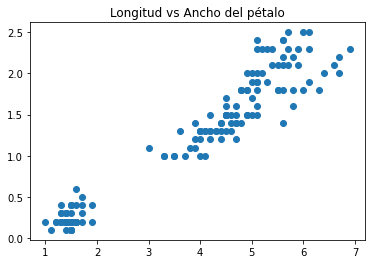

In [23]:
LS = datosNP[:,0] #LongSepalo
AS = datosNP[:,1] #AnchoSepalo
LP = datosNP[:,2] #LongPetalo
AP = datosNP[:,3] #AnchoPetalo
plt.scatter(LP,AP)
plt.title("Longitud vs Ancho del pétalo")

In [24]:
X = np.c_[LS,AS,LP,AP]
kmeans3 = KMeans(n_clusters=3)
cluster3 = kmeans3.fit_predict(X)
print(cluster3)
label = cluster3
c0 = np.nonzero(label==0)[0] 
print('C0:',c0)
c1 = np.nonzero(label==1)[0]
print('C1:',c1)
c2 = np.nonzero(label==2)[0]
print('C2:',c2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
C0: [ 50  51  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 106 113 114 119 121
 123 126 127 133 138 142 146 149]
C1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
C2: [ 52  77 100 102 103 104 105 107 108 109 110 111 112 115 116 117 118 120
 122 124 125 128 129 130 131 132 134 135 136 137 139 140 141 143 144 145
 147 148]


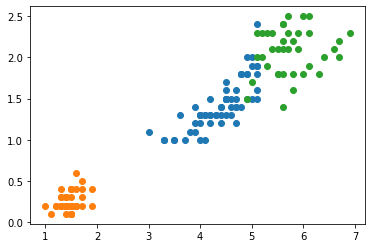

In [25]:
plt.scatter(X[c0,2],X[c0,3]) #Tomo los datos de LP y AP de elementos pertenecientes al cluster 0.
plt.scatter(X[c1,2],X[c1,3])
plt.scatter(X[c2,2],X[c2,3])

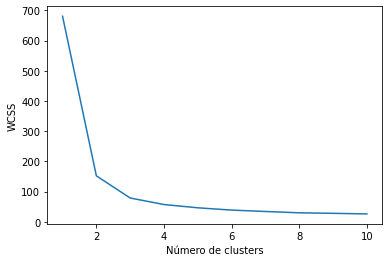

In [27]:
wcss = [] #Obtengo el error

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

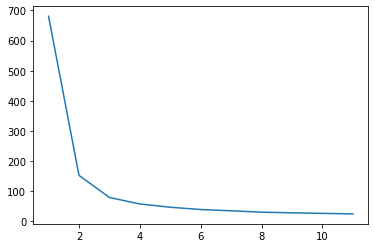

In [29]:
# Otra forma de hacer lo mismo:
W = []
for k in range(1,12): #k=1,...,15
    clus = KMeans(k).fit(X)
    W.append(clus.inertia_)
plt.plot(np.linspace(1,11,11),W)
# En ambos casos se observa que lo óptimo es tomar 2 clusters ya que allí se observa el quiebre de la curva (codo).